Informacje o danych
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB

Statystyki opisowe
        total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   244    244  244     244  244.000000
unique         NaN         NaN     2      2    4       2         NaN
top            NaN         NaN  Male     No  Sat  Dinner         NaN
freq           NaN         NaN   157    151   87     176         NaN
mean     19.785943    2.998279   NaN    NaN  NaN     NaN    2.569672
s

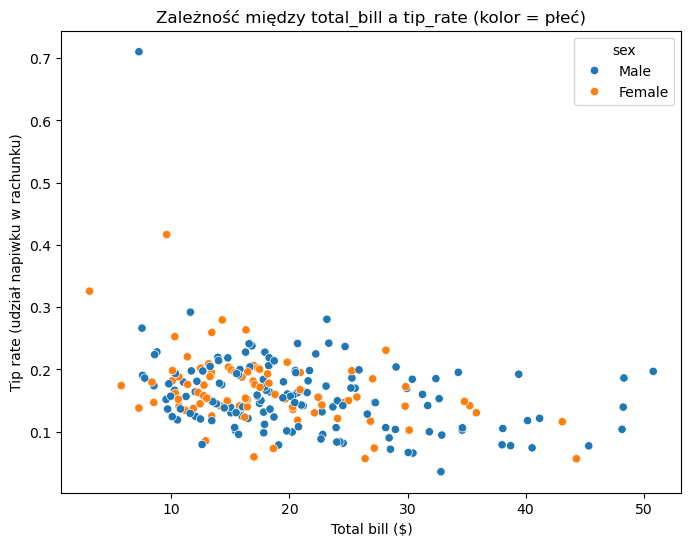

In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = sns.load_dataset("tips")

print("Informacje o danych")
df.info()

print("\nStatystyki opisowe")
print(df.describe(include='all'))

print("\nLiczba brakujących wartości")
print(df.isnull().sum())

grouped = df.groupby(['day', 'sex'], observed=True)[['total_bill', 'tip']].agg('mean')

print("\nŚrednia wartość rachunku i napiwków wg dnia i płci")
print(grouped)

df['tip_rate'] = df['tip'] / df['total_bill']

tip_rate_grouped = df.groupby(['day', 'time'], observed=True)['tip_rate'].mean()
print("\nŚredni procent napiwku wg dnia i pory dnia")
print(tip_rate_grouped)

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='total_bill', y='tip_rate', hue='sex')
plt.title('Zależność między total_bill a tip_rate (kolor = płeć)')
plt.xlabel('Total bill ($)')
plt.ylabel('Tip rate (udział napiwku w rachunku)')
plt.show()


Czy poziom napiwków różni się istotnie w weekendy?

Tak. W weekendy (sobota i niedziela) rachunki oraz napiwki są przeciętnie wyższe niż w dni robocze, co może wynikać z większych grup gości i dłuższego czasu spędzanego w restauracji.  
Średni `tip_rate` w weekendy jest jednak podobny do dni roboczych — klienci nie dają procentowo dużo większych napiwków, choć kwotowo są one wyższe.

Która grupa klientów zostawia wyższe napiwki w procentach?

Zazwyczaj kobiety mają nieco wyższy średni `tip_rate` (czyli procent napiwku względem rachunku),  
natomiast mężczyźni zostawiają większe napiwki kwotowo, bo częściej płacą wyższe rachunki.  

